In [68]:
# Nursat Sakyshev
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd

iris = load_iris()

X = iris.data
y = iris.target

selector = SelectKBest(score_func=chi2, k=2)
X_new = selector.fit_transform(X, y)

selected_features = selector.get_support(indices=True)
selected_feature_names = [iris.feature_names[i] for i in selected_features]

print("Selected feature names:", selected_feature_names)

Selected feature names: ['petal length (cm)', 'petal width (cm)']


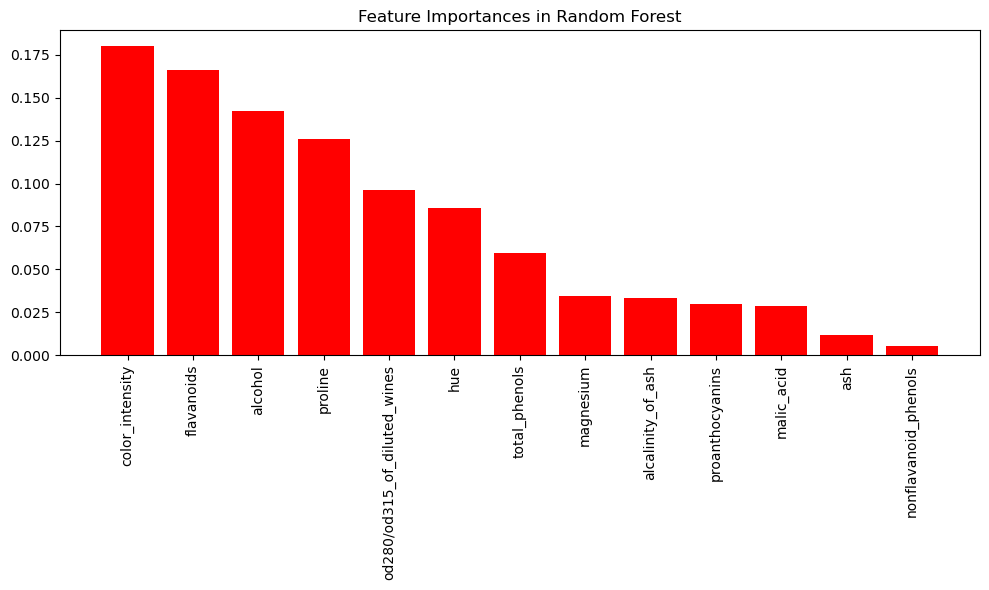

In [30]:
# Nursat Sakyshev
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

wine = load_wine()

x = wine.data
y = wine.target
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.3, random_state=42)

classifier = RandomForestClassifier(random_state=42)
classifier.fit(train_x, train_y)

importances = classifier.feature_importances_
feature_names = wine.feature_names

indices = np.argsort(importances)[::-1]

#plot

plt.figure(figsize=(10,6))
plt.title("Feature Importances in Random Forest")
plt.bar(range(x.shape[1]), importances[indices], color='r', align='center')
plt.xticks(range(x.shape[1]), [feature_names[i] for i in indices], rotation=90)
plt.tight_layout()
plt.show()

In [38]:
# Nursat Sakyshev
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

x = cancer.data
y = cancer.target

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=7)

svm = SVC(kernel="linear")  

rfe = RFE(estimator=svm, n_features_to_select=12)
rfe.fit(train_x, train_y)

train_x_rfe = rfe.transform(train_x)
test_x_rfe = rfe.transform(test_x)

svm.fit(train_x_rfe, train_y)

pred_y = svm.predict(test_x_rfe)  
accuracy = accuracy_score(test_y, pred_y)

print("Model accuracy with selected features:", accuracy)
selected_features = rfe.get_support(indices=True)
print("Selected feature indices:", selected_features)


Model accuracy with selected features: 0.9440559440559441
Selected feature indices: [ 0  5  6  7  8 11 20 24 25 26 27 28]


In [36]:
# Nursat Sakyshev
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

train_x, test_x, train_y, test_y = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25, random_state=7)

lasso = Lasso(alpha=0.05)
lasso.fit(train_x, train_y)

selected_features = train_x.columns[lasso.coef_ != 0]

train_x_selected = train_x[selected_features]
test_x_selected = test_x[selected_features]

lasso_model = Lasso(alpha=0.05)
lasso_model.fit(train_x_selected, train_y)

pred_y = lasso_model.predict(test_x_selected)
mse = mean_squared_error(test_y, pred_y)
print("Mean Squared Error:", mse)


Mean Squared Error: 2926.8152837011344


In [40]:
# classification(1)
# Nursat Sakyshev
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

train_x, test_x, train_y, test_y = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25, random_state=7)

model = LogisticRegression(max_iter=200)
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

accuracy = accuracy_score(test_y, pred_y)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(test_y, pred_y)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.8947368421052632
Confusion Matrix:
 [[11  0  0]
 [ 0 12  2]
 [ 0  2 11]]


In [44]:
# classification(2)
# Nursat Sakyshev
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer()

df = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
df['target'] = breast_cancer.target

train_x, test_x, train_y, test_y = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25, random_state=7)

svm_model = SVC(C=1.5, kernel='linear')
svm_model.fit(train_x, train_y)

pred_y = svm_model.predict(test_x)

accuracy = accuracy_score(test_y, pred_y)
print("Accuracy:", accuracy)
conf_matrix = confusion_matrix(test_y, pred_y)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.951048951048951
Confusion Matrix:
 [[39  6]
 [ 1 97]]


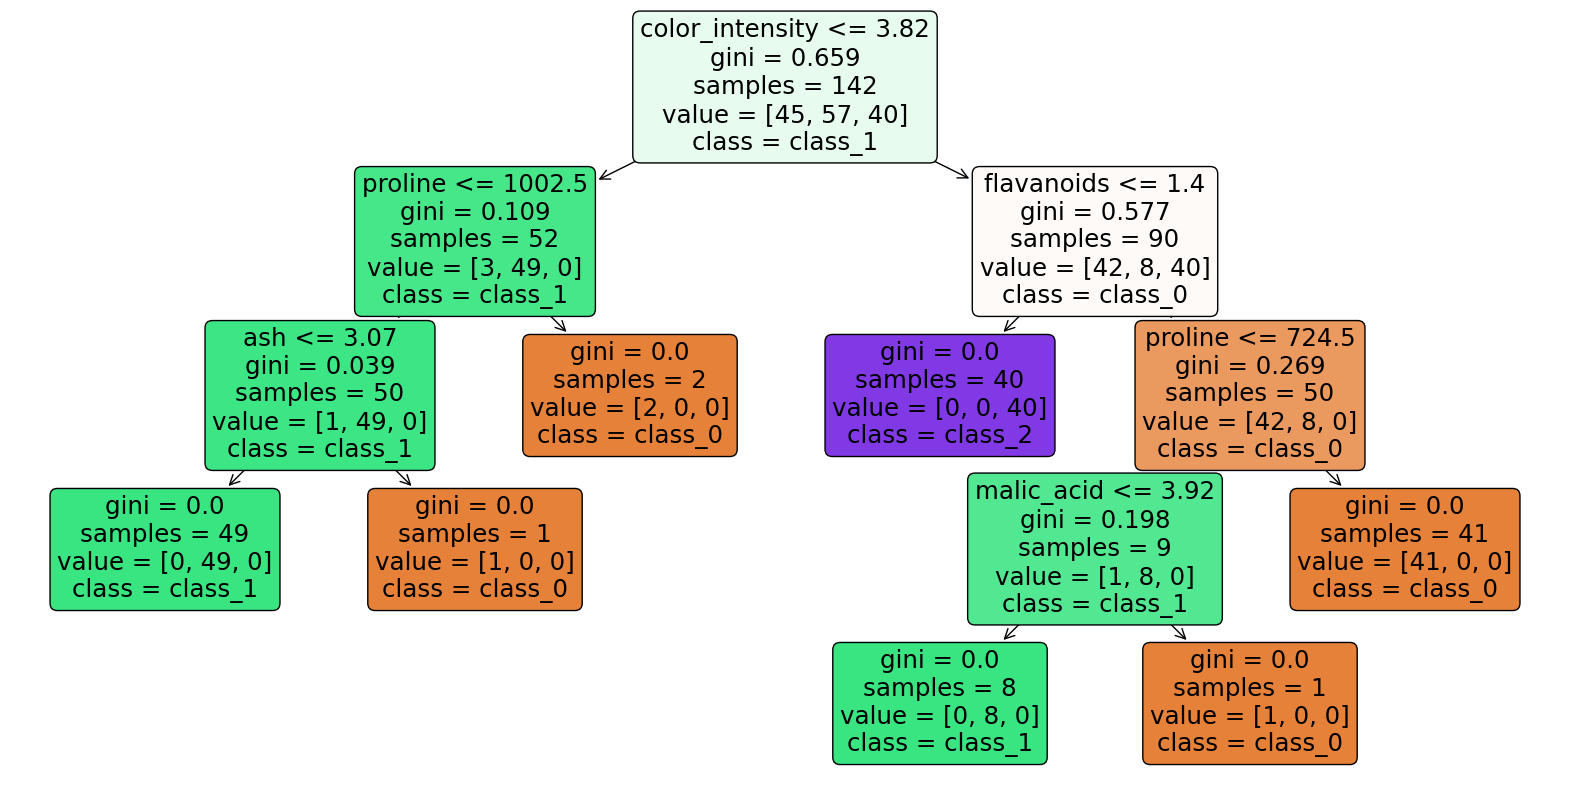

In [58]:
# classification(3)
# Nursat Sakyshev
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

wine = load_wine()

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target

train_x, test_x, train_y, test_y = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(train_x, train_y)

plt.figure(figsize=(20, 10))
plot_tree(clf, filled=True, rounded=True, feature_names=wine.feature_names, class_names=wine.target_names)
plt.show()

In [62]:
# regression(1)
Nursat Sakyshev
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing(as_frame=True)

df = housing_data.frame
train_x, test_x, train_y, test_y = train_test_split(df.drop('MedHouseVal', axis=1), df['MedHouseVal'], test_size=0.25, random_state=7)
model = LinearRegression()
model.fit(train_x, train_y)

pred_y = model.predict(test_x)

mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.5237529866171124
R-squared Score: 0.6070242241118244


In [64]:
# regression(2)
# Nursat Sakyshev
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error, r2_score

diabetes = load_diabetes()

df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

train_x, test_x, train_y, test_y = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.25, random_state=7)

ridge_model = Ridge(alpha=0.2)
ridge_model.fit(train_x, train_y)

pred_y = ridge_model.predict(test_x)

mse = mean_squared_error(test_y, pred_y)
r2 = r2_score(test_y, pred_y)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 2881.422431513095
R-squared Score: 0.5165156971855198


(MSE): 0.54


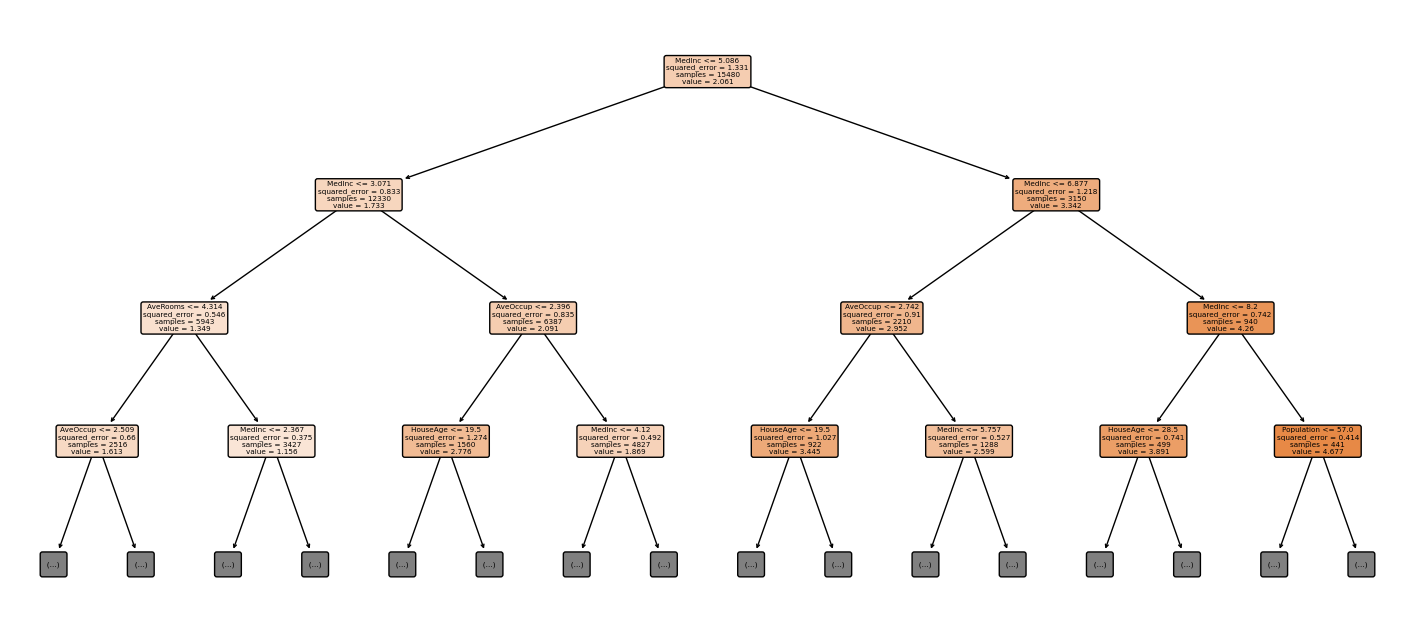

In [66]:
# regression(3)
# Nursat Sakyshev
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Загрузка данных о недвижимости в Калифорнии
data = fetch_california_housing()
X = data.data
y = data.target

# Разделение данных на обучающую и тестовую выборки
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=7)

# Создание и обучение модели дерева регрессии
tree = DecisionTreeRegressor(random_state=7)
tree.fit(train_x, train_y)

# Прогнозирование на тестовых данных
pred_y = tree.predict(test_x)

# Вычисление среднеквадратичной ошибки
mse = mean_squared_error(test_y, pred_y)
print(f"(MSE): {mse:.2f}")

# Визуализация дерева решений
plt.figure(figsize=(18, 8))
plot_tree(tree, filled=True, feature_names=data.feature_names, rounded=True, max_depth=3)
plt.show()
